In [51]:
#importing Required Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from tensorflow import keras
from tensorflow.keras.layers import Dropout,Input
from tensorflow.keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Dropout

In [3]:
df = pd.read_csv("/Users/hiteshchowdary/Downloads/archive (1)/Clean_Dataset.csv")

In [5]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [7]:
len(df)

300153

In [9]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [11]:
df.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [15]:
df['price'].mean()

20889.660523133203

In [ ]:
df = df.drop(columns = ['flight', 'Unnamed: 0'], axis = 1 )

In [19]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [21]:
# Define important trained variables (features) and target variable
trained_variables = ['airline', 'source_city', 'departure_time', 'stops', 'destination_city', 'class', 'duration', 'days_left']
target_variable = 'price'

In [23]:
# Apply one-hot encoding to categorical features
categorical_features = ['airline', 'source_city', 'departure_time', 'stops', 'destination_city', 'class','arrival_time']
ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
encoded_features = ohe.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(categorical_features))


In [25]:
# Combine encoded categorical features with numerical features
df = df.drop(columns=categorical_features)
df = pd.concat([df, encoded_df], axis=1)

In [27]:
# Apply log transformation to the target variable
df[target_variable] = np.log1p(df[target_variable])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   duration                      300153 non-null  float64
 1   days_left                     300153 non-null  int64  
 2   price                         300153 non-null  float64
 3   airline_Air_India             300153 non-null  float64
 4   airline_GO_FIRST              300153 non-null  float64
 5   airline_Indigo                300153 non-null  float64
 6   airline_SpiceJet              300153 non-null  float64
 7   airline_Vistara               300153 non-null  float64
 8   source_city_Chennai           300153 non-null  float64
 9   source_city_Delhi             300153 non-null  float64
 10  source_city_Hyderabad         300153 non-null  float64
 11  source_city_Kolkata           300153 non-null  float64
 12  source_city_Mumbai            300153 non-nul

In [31]:
# Prepare dataset
X = df.drop(columns=[target_variable]).values
y = df[target_variable].values

In [33]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train

array([[19.42,  6.  ,  1.  , ...,  0.  ,  1.  ,  0.  ],
       [ 7.  , 13.  ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [21.17, 44.  ,  1.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [13.67, 29.  ,  1.  , ...,  0.  ,  1.  ,  0.  ],
       [ 8.33, 39.  ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [20.17, 17.  ,  1.  , ...,  0.  ,  1.  ,  0.  ]])

In [37]:
# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
# Define an improved neural network model
model = Sequential([
    Dense(256, input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.2),
    Dense(128),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.2),
    Dense(64),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.2),
    Dense(1, activation='linear')  # Regression output
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Define an improved neural network model
model = Sequential([
    Dense(256, kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.2),
    Dense(128, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.2),
    Dense(64, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.2),
    Dense(1, activation='linear')  # Regression output
])

In [ ]:
#model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.0005),loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [41]:
# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])

In [43]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,945 (199.00 KB)

 Trainable params: 50,049 (195.50 KB)

 Non-trainable params: 896 (3.50 KB)

In [45]:
# Train the model
# Train the model with Early Stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, callbacks=[callback])

Epoch 1/100
3752/3752 ━━━━━━━━━━━━━━━━━━━━ 4s 974us/step - loss: 16.4168 - mae: 2.9559 - val_loss: 0.1558 - val_mae: 0.3023
Epoch 2/100
3752/3752 ━━━━━━━━━━━━━━━━━━━━ 3s 919us/step - loss: 1.1109 - mae: 0.8336 - val_loss: 0.0942 - val_mae: 0.2347
Epoch 3/100
3752/3752 ━━━━━━━━━━━━━━━━━━━━ 3s 899us/step - loss: 0.6582 - mae: 0.6419 - val_loss: 0.0763 - val_mae: 0.2153
Epoch 4/100
3752/3752 ━━━━━━━━━━━━━━━━━━━━ 3s 921us/step - loss: 0.4566 - mae: 0.5356 - val_loss: 0.0690 - val_mae: 0.2029
Epoch 5/100
3752/3752 ━━━━━━━━━━━━━━━━━━━━ 3s 910us/step - loss: 0.3651 - mae: 0.4791 - val_loss: 0.0629 - val_mae: 0.1908
Epoch 6/100
3752/3752 ━━━━━━━━━━━━━━━━━━━━ 3s 898us/step - loss: 0.3204 - mae: 0.4487 - val_loss: 0.0611 - val_mae: 0.1868
Epoch 7/100
3752/3752 ━━━━━━━━━━━━━━━━━━━━ 3s 919us/step - loss: 0.2903 - mae: 0.4270 - val_loss: 0.0573 - val_mae: 0.1794
Epoch 8/100
3752/3752 ━━━━━━━━━━━━━━━━━━━━ 3s 919us/step - loss: 0.2672 - mae: 0.4098 - val_loss: 0.0577 - val_mae: 0.1801
Epoch 9/100
375

In [47]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test MAE: {test_mae}")

1876/1876 ━━━━━━━━━━━━━━━━━━━━ 1s 276us/step - loss: 0.0435 - mae: 0.1492
Test MAE: 0.1489829570055008


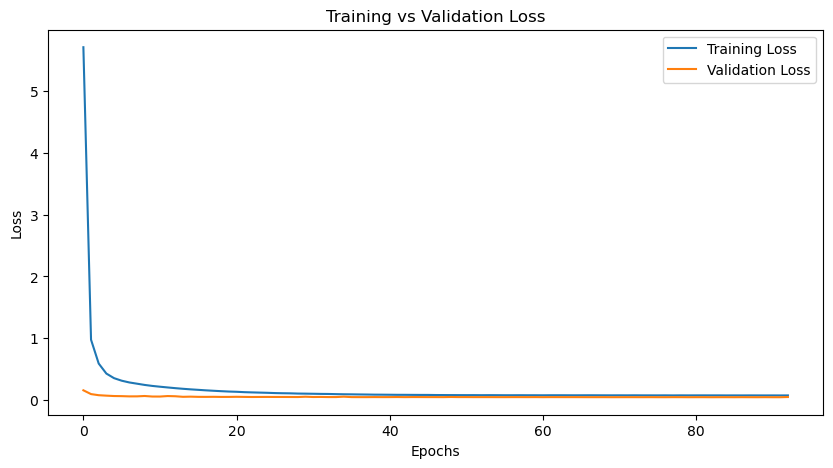

In [53]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


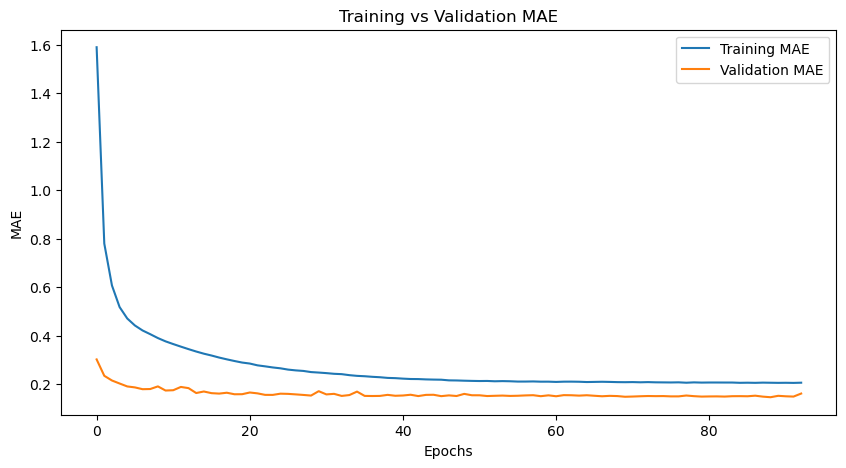

In [55]:
# Plot training and validation MAE
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training vs Validation MAE')
plt.legend()
plt.show()
